In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	6
float64		column 3	0
float64		column 4	0
float64		column 5	9
float64		column 6	0
float64		column 7	0
float64		column 8	3
float64		column 9	0
float64		column 10	0
float64		column 11	3
float64		column 12	3
float64		column 13	0
float64		column 14	6
float64		column 15	0
float64		column 16	6
float64		column 17	0
float64		column 18	0
float64		column 19	9
float64		column 20	3
float64		column 21	3
float64		column 22	0
float64		column 23	3
float64		column 24	6
float64		column 25	0
float64		column 26	0
float64		column 27	6
float64		column 28	0
float64		column 29	6
float64		column 30	6
float64		column 31	0
float64		column 32	6
float64		column 33	9
float64		column 34	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,345.0,351.000000,351.000000,342.000000,351.000000,351.000000,348.000000,351.000000,351.000000,...,351.000000,351.000000,345.000000,351.000000,345.000000,345.000000,351.000000,345.000000,342.000000,348.000000
mean,0.891738,0.0,0.641342,0.044372,0.601190,0.115889,0.550095,0.121505,0.511848,0.181345,...,0.396135,-0.071187,0.537078,-0.069538,0.379570,-0.028655,0.352514,-0.004472,0.341528,0.015098
std,0.311155,0.0,0.497708,0.441435,0.520704,0.460810,0.492654,0.518572,0.507066,0.483851,...,0.578451,0.508495,0.518288,0.550025,0.573034,0.506173,0.571483,0.517351,0.523091,0.470053
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.415473,-0.024795,0.211310,-0.052347,0.087110,-0.048075,...,0.000000,-0.332390,0.277120,-0.443165,0.000000,-0.236490,0.000000,-0.246480,0.000000,-0.163890
50%,1.000000,0.0,0.871110,0.016310,0.808620,0.022800,0.728730,0.015085,0.684210,0.018290,...,0.553890,-0.015050,0.698450,-0.017690,0.496640,0.000000,0.442770,0.000000,0.405180,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.439777,0.953240,0.534195,...,0.905240,0.156765,0.998420,0.153535,0.881250,0.153790,0.857620,0.198490,0.798382,0.172890
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

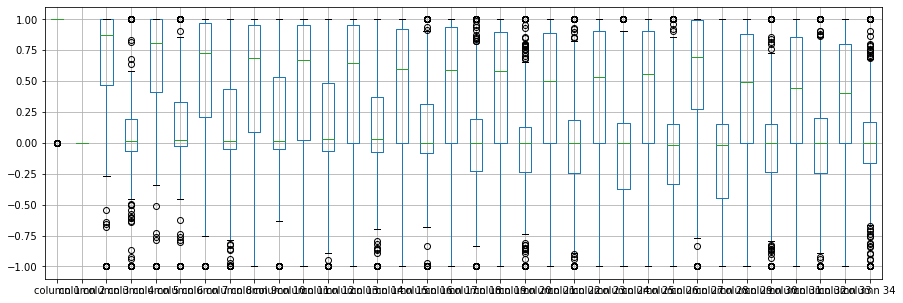

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.601190
column 6     0.115889
column 7     0.550095
column 8     0.121505
column 9     0.511848
column 10    0.181345
column 11    0.475999
column 12    0.158069
column 13    0.400801
column 14    0.091980
column 15    0.344159
column 16    0.070676
column 17    0.381949
column 18   -0.003617
column 19    0.373089
column 20   -0.024619
column 21    0.341107
column 22    0.008296
column 23    0.363707
column 24   -0.061370
column 25    0.396135
column 26   -0.071187
column 27    0.537078
column 28   -0.069538
column 29    0.379570
column 30   -0.028655
column 31    0.352514
column 32   -0.004472
column 33    0.341528
column 34    0.015098
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.158280,0.127606,0.221867,0.028775,0.189242,-0.051883,...,0.016717,0.149789,-0.207358,-0.010725,0.148060,-0.125454,0.167031,-0.101616,0.183836,0.011262
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.472313,0.025768,0.440254,0.006318,0.471614,0.047916,...,0.304898,-0.073202,0.083507,0.123345,0.335195,0.057913,0.246653,-0.007141,0.259236,-0.000122
column 4,-0.006529,NaN,0.143365,1.000000,0.000384,-0.190308,-0.054030,0.242804,-0.302317,0.207697,...,-0.104632,-0.236987,-0.049892,0.000743,-0.037504,0.352166,-0.172276,-0.122278,-0.152890,0.033912
column 5,0.158280,NaN,0.472313,0.000384,1.000000,0.045983,0.589566,-0.025574,0.450507,-0.040984,...,0.238702,-0.037213,0.147622,0.179412,0.249242,0.036795,0.395276,0.027644,0.382397,-0.105337
column 6,0.127606,NaN,0.025768,-0.190308,0.045983,1.000000,-0.010227,0.277287,-0.120712,0.200080,...,-0.177576,0.041787,-0.174312,-0.068775,-0.030495,-0.176705,-0.100240,0.317985,0.007649,0.184474
column 7,0.221867,NaN,0.440254,-0.054030,0.589566,-0.010227,1.000000,-0.159887,0.461889,-0.090268,...,0.286749,0.087734,0.100690,0.109391,0.296740,-0.026327,0.415216,-0.006487,0.541229,-0.078239
column 8,0.028775,NaN,0.006318,0.242804,-0.025574,0.277287,-0.159887,1.000000,-0.332481,0.361363,...,-0.181894,-0.122066,-0.252020,0.077933,-0.131152,0.092600,-0.156650,0.160155,-0.211444,0.366677
column 9,0.189242,NaN,0.471614,-0.302317,0.450507,-0.120712,0.461889,-0.332481,1.000000,-0.251950,...,0.356564,0.107478,0.172975,0.146817,0.334954,-0.031387,0.316021,-0.066476,0.336050,-0.096652
column 10,-0.051883,NaN,0.047916,0.207697,-0.040984,0.200080,-0.090268,0.361363,-0.251950,1.000000,...,-0.254785,-0.043680,-0.254564,0.072018,-0.125230,-0.013083,-0.155661,-0.015601,-0.199572,0.097509


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+56,34+56+56,34+56+56+56,34+56+56+56+56,34+56+56+56,34+56+56,34+56,34], vae_layer = False, seed = 560)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.185111272902716
Epoch: 1 , loss: 20.213307516915457
Epoch: 2 , loss: 20.044607979910715
Epoch: 3 , loss: 20.076696759178525
Epoch: 4 , loss: 19.99830636524019
Epoch: 5 , loss: 19.96924373081752
Epoch: 6 , loss: 19.78349004473005
Epoch: 7 , loss: 19.55109251113165
Epoch: 8 , loss: 19.340710685366677
Epoch: 9 , loss: 18.799930209205264
Epoch: 10 , loss: 18.194283984956286
Epoch: 11 , loss: 17.970215434119815
Epoch: 12 , loss: 17.71405587877546
Epoch: 13 , loss: 17.68308925628662
Epoch: 14 , loss: 17.61325758979434
Epoch: 15 , loss: 17.741797719682967
Epoch: 16 , loss: 17.363450913202193
Epoch: 17 , loss: 17.68214584532238
Epoch: 18 , loss: 17.563609214056108
Epoch: 19 , loss: 17.49939205532982
Epoch: 20 , loss: 17.37692891983759
Epoch: 21 , loss: 17.21764632633754
Epoch: 22 , loss: 17.297340483892533
Epoch: 23 , loss: 17.49248727162679
Epoch: 24 , loss: 17.430649212428502
Epoch: 25 , loss: 17.28704874

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.000000
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16   -1.000000
column 17   -1.000000
column 18   -1.000000
column 19   -0.126998
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30    1.000000
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

4.784236978091203

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.06988351076369606

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NG_1(imp).xlsx", index=False, header=False)